# Introduzione ai sistemi di controllo

In questo notebook esploreremo i concetti fondamentali dei sistemi di controllo e le varie modalità di controllo, inclusi il controllo proporzionale, il controllo integrale e il controllo derivativo.

In un sistema di controllo, abbiamo una struttura di feedback di base composta da diversi componenti:

<table>
<tr>
    <img src="../pics/15_Introduction_to_Control_Systems_feedback_loop.png" alt="15_Introduction_to_Control_Systems_feedback_loop" style="width:650px;"/>
</tr></table>

Per semplicità stiamo considerando un sistema a retroazione unitaria, e quindi ci concentriamo direttamente sull'errore di sistema \$e\$.

- **$G(s)$**: Rappresenta l'impianto, che per semplicità indicheremo come SG.
- **$D$**: la funzione di trasferimento del nostro controller.
- **$N$**: Un modello che cattura i disturbi che agiscono sul sistema.
- **$y$**: la nostra variabile controllata.
- **$y_r$**: Il comando o il segnale di riferimento.
- **$e = y_r - y$**: Il segnale di errore


Appunti:
- Feedback unitario quindi $e = r-y$, mentre se fosse avvenuto tramite un sensore avremmo avuto $\hat{e}$.

- Ora concentriamoci sul controller, indicato come $D$. Fino ad ora, il tipo più elementare di controller che abbiamo utilizzato è un amplificatore. In questo corso abbiamo esplorato amplificatori con guadagni diversi in una varietà di contesti industriali. Tuttavia, come abbiamo osservato nella nostra discussione precedente, un amplificatore da solo potrebbe non soddisfare tutti i nostri obiettivi prestazionali. C'è un conflitto intrinseco negli obiettivi prestazionali. Ad esempio, l'aumento del guadagno dell'amplificatore migliora alcune caratteristiche prestazionali del sistema, ma allo stesso tempo può avere un impatto negativo su altri aspetti cruciali.

- Dobbiamo anche tenere presente che non è necessario vincolare la forma di $D(s)$.

Storicamente esistevano limitazioni hardware (i controller dovevano essere idraulici, pneumatici o elettrici).

Con l'avvento della tecnologia digitale, praticamente qualsiasi funzione può essere realizzata tramite un computer digitale, eliminando le limitazioni dei sistemi di controllo basati su hardware.

## Controllo proporzionale (controllo P)

Il controllo proporzionale è una delle modalità di controllo più semplici. Il segnale di controllo \$u\$ nel controllo proporzionale è dato da:

$$
u = K_c \cdot e
$$

Dove $K_c$ è il guadagno del controller.

Nel dominio di Laplace:

$$
U(s) = K_c \cdot E(s)
$$

## Proporzionale - Controllo integrale (controllo PI)

Il controllo proporzionale-integrale, spesso noto come controllo PI, introduce un'azione integrale per migliorare le prestazioni del controllo.

Il segnale di controllo $u$ in controllo integrale è dato da:

$$
u = K_c \cdot \big( e + \frac{1}{T_I} \int e dt \big)
$$

È composto da due componenti, una proporzionale all'errore e una proporzionale all'integrale dell'errore.

Nel dominio di Laplace:

$$
u = K_c \cdot \big( 1 + \frac{1}{T_I s}\big)E(s)
$$

A volte scritto anche come:

$$
u = \big( K_c + \frac{K_I}{s}\big)E(s)
$$


Dove:
- $K_I$ è chiamato guadagno integrale
- $K_c$ è chiamato guadagno del controller
- $T_I$ è il tempo integrale o tempo di reset.

Esploreremo i vantaggi del controllo integrale e la sua applicazione nei sistemi di controllo.

## Controllo proporzionale-derivativo (controllo PD)

Il controllo proporzionale-derivativo, spesso noto come controllo PD, introduce un'azione derivativa nei sistemi di controllo.

Il segnale di controllo $u$ nel controllo derivato è dato da:

$$
u = K_c \big(e + T_D \dot{e}\big )
$$

Nel dominio di Laplace:

$$
U(s) = K_c \big(1 + T_D s\big )E(s)
$$

Dove $T_D$ è il tempo derivativo o il tempo del tasso.


A volte scritto anche come:

$$
u = \big( K_c + K_D s\big)E(s)
$$

Dove $K_D$ è chiamato guadagno derivato.

Esamineremo il ruolo del controllo derivato e il suo impatto sulle prestazioni del sistema di controllo.

## Controllo PID

Il controllo PID combina azioni proporzionali, integrali e derivative in un unico controller. Il segnale di controllo $u$ nel controllo PID è dato da:

$$
u = K_c \cdot (e + \frac{1}{T_I} \int e dt + T_D \cdot \frac{de}{dt})
$$

$$
U(s) = K_c \big(1+\frac{1}{T_I s} + T_Ds\big)E(s)
$$

A volte scritto anche come:

$$
U(s) = \big(K_c+\frac{K_I}{s} + K_Ds\big)E(s)
$$


Spesso utilizzato come primo tentativo prima di tentare metodi diversi se il PID non funziona.

## Esempio: sistema di controllo della temperatura

Considera un sistema di controllo della temperatura progettato per mantenere la temperatura di una camera a un livello prescritto. Questo sistema costituisce un eccellente esempio del controllo proporzionale.

- Descrizione del sistema: Consideriamo un sistema di controllo della temperatura, ovvero una camera in cui la temperatura deve essere mantenuta a un livello specifico $\theta_r$.
La variabile di disturbo (temperatura ambiente) in questo sistema è indicata come $\theta_a$ e $\theta$ rappresenta la temperatura della camera.

- Contesto applicativo: questo sistema può essere paragonato a una camera di prova per apparecchiature elettroniche, dove è necessario regolare la temperatura per testare i componenti in diverse condizioni termiche.


<table>
<tr>
    <img src="../pics/15_Introduction_to_Control_Systems_temperature_control.png" alt="15_Introduction_to_Control_Systems_temperature_control" style="width:650px;"/>
</tr></table>

Componenti del sistema:
- Temperatura della Camera ($\theta$): La variabile primaria da regolare.
- Variabile di disturbo ($\theta_a$): fattori esterni che influenzano la temperatura della camera, come la temperatura ambiente.
- Termocoppia: un sensore utilizzato per misurare la temperatura della camera.
- Trasduttore Elettropneumatico: Converte il segnale elettrico in un segnale di pressione.
- Posizionatore della valvola: regola una valvola per controllare il flusso di vapore, regolando così la temperatura della camera.
- Scambiatore di calore: Facilita il riscaldamento dell'aria all'interno della camera.

Operazione:
-La temperatura desiderata ($\theta_r$) viene impostata e confrontata con la temperatura effettiva (θ).
- La termocoppia genera un segnale elettrico proporzionale alla differenza di temperatura.
- Questo segnale viene amplificato e utilizzato per regolare la posizione della valvola, controllando il flusso di vapore e, di conseguenza, la temperatura.


Requisiti di controllo

- Obiettivo: mantenere la temperatura della camera ad un valore regolato, $\theta_r$.
- Rilevamento della temperatura: una termocoppia viene utilizzata come sensore per misurare la temperatura della camera.
- Calcolo dell'errore: l'uscita del sensore, indicata come $e_t$, viene confrontata con un valore di riferimento $e_r$ (proporzionale a $\theta_r$) per calcolare il segnale di errore $e$.

Controller e attuatori

- Amplificatore come controller: l'uscita dell'amplificatore, in base al segnale di errore, viene utilizzata per controllare il trasduttore elettropneumatico, che a sua volta genera un segnale di pressione.
- Posizionatore della valvola: questo dispositivo regola la valvola in base al segnale di pressione, controllando il flusso di vapore e quindi la temperatura nella camera.

Disturbi

- Sorgenti di disturbo: i cambiamenti della temperatura ambientale o le variazioni del segnale di comando sono i disturbi principali.
- Risposta del sistema: il sistema di controllo regola la portata del vapore per ripristinare l'equilibrio in risposta ai disturbi.

### Utilizzo di un proporzionale proporzionale

Analizziamo quanto sia efficace il controllo proporzionale nel mantenere la temperatura desiderata in presenza di disturbi.

🤔 **Domanda popup**: Cosa succede al segnale di errore $e$ quando la temperatura della camera $\theta$ è uguale al setpoint $\theta_r$?

**Risposta**: Il segnale di errore $e$ diventa zero, indicando che non vi è alcuna discrepanza tra la temperatura desiderata e quella effettiva.


<table>
<tr>
    <img src="../pics/15_Introduction_to_Control_Systems_temperature_control_1.png" alt="15_Introduction_to_Control_Systems_temperature_control_1" style="width:650px;"/>
</tr></table>

Nello stato di equilibrio sia il segnale di errore che il segnale di controllo sono nulli. La regolazione iniziale del trasduttore elettropneumatico all'interno del posizionatore della valvola mantiene l'equilibrio termico. Questa regolazione compensa inoltre eventuali perdite di calore nell'ambiente circostante, a condizione che la temperatura ambiente rimanga costante.

**Cosa succede se si verificano disordini?**

Le perturbazioni dalla posizione di equilibrio possono essere create da
- Cambiamento nell'ambiente
- Modifica del segnale di comando

Quando ciò accade, abbiamo un segnale di errore $e$ e un corrispondente segnale di controllo $u$ che deve riaggiustare la portata del vapore per raggiungere un nuovo equilibrio.

### Modellazione del sistema di controllo della temperatura

- **Modello matematico:** Possiamo modellare la camera come un sistema del primo ordine con una funzione di trasferimento

$$ \frac{K_p}{\tau_p s + 1} $$

dove $K_p$ è il guadagno del processo e $\tau_p$ è la costante di tempo.

- **Disturbo:** I cambiamenti nella temperatura ambientale ($\theta_a$) possono perturbare il sistema dal suo equilibrio.

Possiamo quindi modellare l'influenza del disturbo come un sistema del primo ordine con una funzione di trasferimento

$$ \frac{1}{\tau_p s + 1} $$

Impostare $K$ come 1 implica che stiamo assumendo un impatto diretto e uno a uno di $ \theta_a $ su $ \theta $ allo stato stazionario. Se una valutazione sperimentale rivela una deviazione da questa ipotesi, è possibile introdurre una costante appropriata per tenere conto della differenza.

_Quando consideriamo i modelli dinamici consideriamo sempre rispetto allo stato stazionario. La temperatura ambiente totale non è $\theta_a$, che è la perturbazione della temperatura ambiente dal punto di equilibrio._

<table>
<tr>
    <img src="../pics/15_Introduction_to_Control_Systems_temperature_control_1.png" alt="15_Introduction_to_Control_Systems_temperature_control_1" style="width:650px;"/>
</tr></table>

### Diagramma a blocchi

Possiamo quindi scrivere lo schema a blocchi del sistema di termoregolazione, illustrando la relazione tra il segnale di controllo, l'impianto e l'uscita.


<table>
<tr>
    <img src="../pics/15_Introduction_to_Control_Systems_temperature_control_2.png" alt="15_Introduction_to_Control_Systems_temperature_control_2" style="width:750px;"/>
</tr></table>

Nell'esempio del sistema di controllo della temperatura, stiamo osservando un controller proporzionale (P) in cui vengono moltiplicati insieme vari guadagni. Analizziamo questi guadagni e le loro unità per comprendere l'unità complessiva del controller proporzionale in questo contesto.

### Ripartizione dei guadagni e delle loro unità

1. **Guadagno dell'amplificatore ($K_A$):** questo guadagno è generalmente espresso nell'unità volt per volt (V/V), poiché mette in relazione la tensione di uscita con la tensione di ingresso dell'amplificatore.

2. **Guadagno trasduttore elettropneumatico ($K_e$):** questo guadagno converte il segnale elettrico (tensione) in un segnale pneumatico (pressione).

3. **Guadagno posizionatore valvola ($K_x$):** Mette in relazione il segnale di pressione pneumatica con la posizione meccanica della valvola. La sua unità potrebbe essere adimensionale e rappresentare il rapporto tra lo spostamento dello stelo della valvola e il segnale di pressione in ingresso (ad esempio mm/psi o mm/bar).

4. **Guadagno valvola di controllo ($K_v$):** Questo guadagno descrive come la posizione della valvola influisce sulla portata del vapore. L'unità potrebbe essere in termini di portata di vapore per unità di spostamento, ad esempio metri cubi all'ora per millimetro (m³/h/mm).

### Calcolo del guadagno complessivo del controller proporzionale

Quando questi guadagni vengono moltiplicati insieme, l'unità risultante del guadagno complessivo del controller proporzionale ($K$) sarà un composto di tutte queste singole unità. Nello scenario indicato, le unità si moltiplicherebbero come segue:

$$ K = K_A \times K_e \times K_x \times K_v $$

Quindi, ad esempio, l'unità di $K$ sarebbe:

$$ \text{V/V} \times \text{psi/V} \times \text{(mm/psi)} \times \text{(m³/h/mm)} $$

Se semplificato, questo ci dà:

$$ \text{m³/h/V} $$

### Interpretazione

L'unità risultante di m³/h/V indica che la produzione del controller, in termini di portata di vapore (m³/h), è proporzionale alla tensione in ingresso al sistema. Ciò riflette l'essenza di un controller proporzionale, in cui l'uscita è direttamente proporzionale al segnale di errore, che, in questo caso, è rappresentato in tensione.

Questa conoscenza dettagliata delle unità è fondamentale per la progettazione e la messa a punto dei sistemi di controllo, garantendo che il controller funzioni entro l'intervallo desiderato e gestisca efficacemente l'impianto che sta controllando.

### Componenti come sistemi di ordine zero

Abbiamo semplificato il nostro modello trattando tutti questi componenti come sistemi di ordine zero, ignorando le loro dinamiche intrinseche. È importante ricordare che questi componenti possiedono caratteristiche dinamiche.

Caratterizzarli come sistemi di ordine zero implica l'assunzione di una risposta istantanea, che non è possibile per nessun sistema fisico. Tuttavia questa semplificazione è dovuta al fatto che le costanti di tempo di questi singoli componenti sono notevolmente piccole rispetto alla costante di tempo dell'impianto $ \tau_p $.

## Comprendere l'impatto del disturbo ($\theta_a$)

Con riferimento al disegno fisico sopra riportato, considerare un aumento della temperatura ambiente ($\theta_a$). Intuitivamente, se la temperatura esterna aumenta, il flusso di calore in uscita dal sistema diminuirà, portando ad un aumento della temperatura della camera.

Premesso questo, considereremo positivo l'effetto del disturbo $\theta_a$ sul sistema $\theta$ (vedi punto di somma nello schema a blocchi).

## Effetti del guadagno dell'amplificatore

Il nostro obiettivo è studiare l'effetto del guadagno dell'amplificatore ($K_A$) su vari parametri prestazionali come errore a regime, risposta ai transitori e sensibilità ai disturbi.

### Sviluppo dell'equazione del sistema

#### Descrivere le equazioni

1. **Segnale di errore:** L'errore è rappresentato da

$$e = K_t \theta_r(s) - K_t \theta(s)$$

dove $K_t$ è la costante della termocoppia, $\theta_r$ è la temperatura di riferimento e $\theta$ è la temperatura effettiva.

2. **Segnale di controllo:** il segnale di errore viene moltiplicato per il prodotto dei guadagni

$$K_A K_e K_x K_v$$

risultante nella variabile manipolata.

3. **Dinamica complessiva del sistema:** Incorporando la dinamica dell'impianto, rappresentata da $\frac{K_p}{\tau_p s + 1}$, e il disturbo $\theta_a$, otteniamo un'equazione completa che descrive il sistema:

$$\Big[ (K_t \theta_r(s) - K_t \theta(s))K_A K_e K_x K_v \Big] \frac{K_p}{\tau_p s + 1}$$

4. **Incluso il disturbo:**

$$\Big[ (K_t \theta_r(s) - K_t \theta(s))K_A K_e K_x K_v \Big] \frac{K_p}{\tau_p s + 1} + \frac{1}{\tau_p s + 1}\theta_a(s) = \theta$$

#### Manipolazione dell'equazione

- **Obiettivo:** Esprimere l'uscita del sistema $\theta(s)$ in termini di ingresso di riferimento $\theta_r(s)$ e disturbo \(\theta_a(s)\).

$$ (\tau_p s + 1)\theta(s) + K_tK_A K_e K_x K_vK_p\theta(s) = (K_tK_A K_e K_x K_vK_p)\theta_r + \theta_a $$


- **Guadagno del loop ($K$):** Combinando le costanti, definiamo

$$K = K_t K_A K_e K_x K_v K_p$$

definito guadagno d'anello.

Questo guadagno, in particolare $K_A$ (il guadagno dell'amplificatore), influenza direttamente la risposta del sistema.

### Equazione finale

Utilizzando il guadagno d'anello $K$ possiamo ora ottenere:

$$ (\tau_p s + 1 + K )\theta(s) = K \theta_r(s) + \theta_a(s) $$


**Interpretazione:** Questa equazione collega la temperatura di uscita $\theta(s)$ con la temperatura di riferimento $\theta_r(s)$ e il disturbo della temperatura ambiente $\theta_a(s)$.

### Punti chiave da notare

- **Costante di controllo proporzionale:** Il guadagno del circuito $K$ può essere considerato come una costante di controllo proporzionale, che riflette l'efficacia del controllore proporzionale nel mantenere la temperatura desiderata in presenza di disturbi.

- **Attenzione ai dettagli:** È necessario prestare attenzione nella derivazione di questa equazione. Qualsiasi errore nella manipolazione può portare a conclusioni errate sul comportamento del sistema.

Quindi in questo caso l'equazione finale è:

$$ \theta(s) = \frac{K}{\tau_p s + 1 + K} \theta_r(s) + \frac{1}{\tau_p s + 1 + K} \theta_a(s) $$

Abbiamo la relazione tra l'uscita $\theta(s)$ e il comando $\theta_r(s)$ e tra l'uscita $\theta(s)$ e il disturbo $\theta_a(s)$.


#### Impatto del feedback sulla costante di tempo

Riscrivere l'espressione del sistema come

$$ \theta(s) = \frac{K}{1 + K} \cdot \frac{1}{\tau s + 1} \theta_r(s) + \frac{1}{1 + K} \cdot \frac{1}{\tau s + 1} \theta_a(s) $$


osserviamo che la costante di tempo del sistema retroazionato, $ \tau $, è:

$$\tau = \frac{\tau_p}{1 + K} $$


- Qui \( \tau_p \) è la costante di tempo originale della pianta senza feedback.
- Il feedback riduce la costante di tempo ($ \tau $) poiché $ K > 0 $.
- Implicazione: una riduzione della costante di tempo implica una risposta più rapida del sistema. I transitori decadono più rapidamente e il sistema raggiunge lo stato stazionario prima dopo un disturbo.

#### Analisi degli errori in stato stazionario

Analizziamo ora l'errore a regime. Per questo separiamo l'effetto dell'ingresso $\theta_r$ e quello del disturbo $\theta_a$ (possiamo applicare la sovrapposizione dato che parliamo di sistemi lineari).

Più nel dettaglio, analizziamo la risposta del sistema ad un ingresso a gradino unitario per determinare il valore di regime:

$$\theta_r = \frac{1}{s}$$

e l'output è:

$$ \theta(s) = \frac{K}{1 + K} \cdot \frac{1}{\tau s + 1} \frac{1}{s} $$


**Valore di stato stazionario per ingresso passo:**

$$ \theta_{ss} = \lim_{s \to 0} s \theta(s) = \frac{K}{1 + K} $$

Esaminiamo ora la risposta del sistema ad un disturbo a gradino unitario.

$$\theta_a = \frac{1}{s}$$

**Valore di stato stazionario per disturbo:**

$$ \theta_{ss} = \frac{1}{1 + K} $$


#### Commenti e risultati

**Segnale di comando:**
- $\theta_r(s)$ è il segnale di comando. Vogliamo che $\theta_{ss}$ sia uguale a 1 (stiamo monitorando un input di passo unitario).
- All'aumentare di $ K $, $ \theta_{ss} $ si avvicina a 1, riducendo l'errore a regime per segnali di comando costanti.
- All'aumentare di $ K $, l'errore a regime in risposta a un segnale di comando diminuisce.

 
**Rifiuto per disturbo:**
- Valori $K$ più alti migliorano la reiezione del disturbo, spingendo \(\theta_{ss}\) verso lo zero, e quindi filtrando il disturbo.


- **Miglioramento con $ K $ elevati:** le prestazioni sia in stato transitorio che stazionario migliorano con un $ K $ più elevato.
- **Scenario ideale:** Teoricamente, con $ K \rightarrow \infty $, il sistema avrebbe una risposta immediata e un errore in stato stazionario pari a zero.

#### Il compromesso tra prestazioni e stabilità

- **Miglioramento rispetto alla stabilità:**
  - Valori $ K $ più alti migliorano le prestazioni sia transitorie che stazionarie.
  - Teoricamente, un $ K $ infinito risulterebbe in un sistema istantaneo con errore stazionario pari a zero.
  - Tuttavia, ciò porta a un conflitto tra miglioramento delle prestazioni e stabilità del sistema.

#### Considerazioni sulle dinamiche di sistema:

- **Rivisitazione delle dinamiche dei componenti:**
  - Il nostro modello iniziale utilizzava approssimazioni di ordine zero per componenti come l'amplificatore e il posizionatore della valvola (le loro costanti di tempo sono trascurabili rispetto alla costante di tempo $\tau_p$ dell'impianto).
  - Quando operiamo in retroazione invece la costante temporale è $\tau=\frac{\tau_p}{1+K}$
  - All'aumentare di $ K $ e alla diminuzione della costante di tempo effettiva ($ \tau $), queste approssimazioni diventano non valide (le costanti di tempo delle componenti non sono più trascurabili).

- **Implicazioni di valori $ K$ elevati:**
  - Un $ K $ elevato trasforma il sistema del primo ordine (vedi lo schema a blocchi iniziale sopra) in un sistema di ordine superiore, potenzialmente del quinto ordine (vedi lo schema a blocchi sotto).
  - I sistemi di ordine elevato (> terzo ordine) possono diventare instabili con grandi valori di $ K $ (vedremo perché più avanti quando studieremo gli strumenti di analisi della stabilità).
  - Il sistema quindi non si comporta come vorremmo.
  - Questa instabilità introduce un compromesso tra le prestazioni del sistema (precisione in stato stazionario) e i suoi requisiti di stabilità.
  
- **Non linearità e saturazione:** valori elevati di $K$ possono portare i componenti alla saturazione, portando a un comportamento non lineare e potenziale instabilità.


<table>
<tr>
    <img src="../pics/15_Introduction_to_Control_Systems_temperature_control_3.png" alt="15_Introduction_to_Control_Systems_temperature_control_3" style="width:750px;"/>
</tr></table>

Per rendere il concetto più chiaro, facciamo un esempio


<table>
<tr>
    <img src="../pics/15_Introduction_to_Control_Systems_temperature_control_4.png?1" alt="15_Introduction_to_Control_Systems_temperature_control_4" style="width:750px;"/>
</tr></table>

La funzione di trasferimento ad anello chiuso diventa:

$$
\frac{\theta(s)}{\theta_r(s)} = \frac{\frac{K_cK_vK_p}{(\tau_cs+1)(\tau_vs+1)(\tau_ps+1)}}{1+\ frac{K_cK_vK_p}{(\tau_cs+1)(\tau_vs+1)(\tau_ps+1)}} = \frac{K_cK_vK_p}{(\tau_cs+1)(\tau_vs+1)(\tau_ps+1) + K_cK_vK_p}
$$

L'espressione originale per il sistema senza la dinamica del primo ordine dei singoli componenti era:

$$
\frac{\theta(s)}{\theta_r(s)} = \frac{K}{\tau_p s + 1 + K}
$$

In quest’ultimo caso l’equazione caratteristica è:

$$
\tau_ps + 1 + K = 0
$$

e la sua radice (il polo del sistema ad anello chiuso) è:

$$
s = -\frac{1+K}{\tau_p}
$$

Non abbiamo discusso la stabilità nei dettagli, ma intuitivamente (quella delle equazioni differenziali e delle sue soluzioni), se i poli sono nella Mezza Posta Sinistra (LHP) il sistema è stabile.

Nel caso in cui $s = -\frac{1+K}{\tau_p}$, per tutti i valori di $K$, $s$ è sempre negativo.


Quando consideriamo le costanti di tempo per ciascuna componente, l'equazione caratteristica diventa quella di un sistema del terzo ordine:

$$ a_1 s^3 + a_2 s^2 + a_3 s + a_4 = 0 $$

Questa equazione ha tre poli nel piano s (tre radici che puoi calcolare come esercizio). Per valori elevati di $K$ alcuni poli vengono spinti verso il semipiano destro (RHP) portando ad un sistema instabile.

I poli di questo sistema di ordine superiore, influenzato da $K$, ne determinano la stabilità.

### Commenti:
- Una volta che il sistema è instabile, tutto il resto non ha importanza! Non ha senso studiare le costanti di tempo, ecc.
- In circuito aperto, le singole modalità dinamiche sono stabili, ma in circuito chiuso la loro interazione può portare all'instabilità.
- Il circuito di feedback, che contribuisce a migliorare robustezza e sensibilità, crea anche problemi di stabilità.

## Controllo integrale ed errore di stato stazionario

Affrontare l'errore dello stato stazionario con il controllo integrale

- Limitazione del controllo proporzionale: nel controllo proporzionale, è necessario un errore persistente per mantenere l'equilibrio del sistema. Se l'errore è zero, l'azione di controllo è zero (vedere il diagramma seguente).

<table>
<tr>
    <img src="../pics/15_Introduction_to_Control_Systems_temperature_control_5.png" alt="15_Introduction_to_Control_Systems_temperature_control_5" style="width:750px;"/>
</tr></table>

Nel controllo proporzionale, l'errore fornisce l'energia necessaria per sostenere un nuovo equilibrio.
Il nuovo equilibrio si ottiene utilizzando nuova energia disponibile solo se è presente il segnale di errore. Se l'errore è zero, si torna alla posizione di equilibrio originale. Tuttavia ciò non è possibile perché il sistema è costretto alla nuova situazione.

- Ruolo del controllo integrale: il controller integrale accumula l'errore nel tempo, consentendo all'errore di ridursi a zero pur fornendo l'azione di controllo necessaria.


<table>
<tr>
    <img src="../pics/15_Introduction_to_Control_Systems_temperature_control_6.png?1" alt="15_Introduction_to_Control_Systems_temperature_control_6" style="width:750px;"/>
</tr></table>


Il controllo integrale utilizza l'accumulo di errori passati per raggiungere questo obiettivo, consentendo all'errore di ridursi eventualmente a zero.
Questo è sempre possibile per la tipologia di impianti che stiamo considerando.

-----

## Rivisitare il sistema di controllo della temperatura

Rivisiteremo ora il processo di controllo della temperatura discusso in precedenza, concentrandoci sulle dinamiche del sistema, in particolare sul ruolo del controllo integrale nel miglioramento delle prestazioni del sistema.

### Panoramica del sistema

<table>
<tr>
    <img src="../pics/15_Introduction_to_Control_Systems_temperature_control_2.png" alt="15_Introduction_to_Control_Systems_temperature_control_2" style="width:750px;"/>
</tr></table>

#### Descrizione del diagramma a blocchi

- **Temperatura di riferimento:** Indicata come $\theta_r$, l'impostazione della temperatura desiderata.
- **Sensore e segnale di errore:** Un sensore a termocoppia converte $\theta_r$ in un segnale di tensione. Questa tensione viene confrontata con la tensione di temperatura effettiva per generare un segnale di errore.
- **Amplificatore e Trasduttore:** Il segnale di errore viene amplificato (guadagno $K_A$) e quindi inviato ad un trasduttore elettropneumatico (costante $K_e$).
- **Posizionatore e guadagno della valvola:** il segnale del trasduttore controlla un posizionatore della valvola (costante \(K_x\)) per regolare la portata, influenzato dal guadagno della valvola $K_v$.
- **Funzione di trasferimento del processo:** Rappresentata come $\frac{K_p}{\tau_p s + 1}$.
- **Effetto di disturbo:** Modellato come $\frac{1}{\tau_p s + 1}$, dove $\theta_a$ è il disturbo della temperatura ambiente.

### Dinamica e stabilità del sistema

Quando abbiamo assunto che l'impianto fosse un sistema del primo ordine e che i vari componenti possano essere approssimati come di ordine zero:
- **Prestazioni transitorie:** Il guadagno del circuito più ampio ($K$) migliora le prestazioni transitorie riducendo la costante di tempo del sistema.
- **Errore in stato stazionario:** $K$ più grandi riducono anche l'errore in stato stazionario.
- **Limiti sul guadagno:** Un guadagno elevato $K$ può portare alla saturazione dei componenti e al comportamento non lineare, limitando l'intervallo di risposta lineare del sistema. Inoltre, la dinamica dei vari componenti non può essere trascurata, portando a una potenziale instabilità.

### Controllo integrale nei sistemi di temperatura

#### Indirizzamento alle modifiche del segnale di comando

- **Scenario:** Considerare l'esigenza di aumentare la temperatura della camera di 10 gradi.
- **Cambio comando:** Ciò richiede un cambiamento in $\theta_r$ dello stesso importo.

#### Meccanismo di controllo integrale

- **Dinamica del segnale di errore:** Con il controllo integrale, il sistema può gestire le modifiche nel segnale di comando mantenendo stabilità e prestazioni.

**Espressione matematica:**

$$ u(t) = K_I \int e(t) \, dt $$

**Commenti:**
- **Ruolo nella stabilità del sistema:** Il controllo integrale consente al sistema di adattarsi automaticamente a nuovi equilibri senza compromettere la stabilità.

- **Adattabilità del sistema:** Il controller integrale regola l'azione di controllo nel tempo in base all'errore accumulato, portando a un errore stazionario pari a zero anche con modifiche dei comandi.

- **Adattabilità del sistema:** Il controller integrale regola l'azione di controllo nel tempo in base all'errore accumulato, portando a un errore stazionario pari a zero anche con modifiche dei comandi.

Ci sarà un prezzo da pagare: il controllo integrale potrebbe portare all’instabilità ancor più dell’utilizzo di un semplice controllo proporzionale.

### Implementazione del controllo integrale nei sistemi di temperatura

Sostituiamo l'amplificatore $K_A$ con un controller integrale $K_I/s$.

**Dinamica del sistema:** il sistema ora include il controller integrale, il trasduttore elettropneumatico ($K_e$), il posizionatore della valvola ($K_x$) e il guadagno della valvola ($K_v$).

<table>
<tr>
    <img src="../pics/15_Introduction_to_Control_Systems_temperature_control_7.png" alt="15_Introduction_to_Control_Systems_temperature_control_7" style="width:750px;"/>
</tr></table>


Sulla base di questo diagramma a blocchi possiamo quindi scrivere le equazioni matematiche:

$$
(K_t\theta_r - K_t\theta)\cdot \Big(\frac{K_I}{s}K_eK_xK_v \Big) \Big(\frac{K_p}{\tau_ps+1} \Big) + \frac{1}{ \tau_ps+1} \theta_a = \theta
$$

Possiamo quindi riorganizzare l'equazione per isolare $\theta(s)$ da un lato.:

$$
(\tau_p s + 1)\theta(s) + \frac{K}{s} \theta(s) = \frac{K}{s} \theta_r(s) + \theta_a(s)
$$

dove $K = K_tK_IK_eK_xK_vK_p$.

E quindi:

$$
\Big(\tau_p s + 1 + \frac{K}{s}\Big) \theta(s) = \frac{K}{s} \theta_r(s) + \theta_a(s)
$$

o equivalentemente:

$$
\Big(\tau_p s^2 + s + K \Big) \theta(s) = K \theta_r(s) + s\theta_a(s)
$$

### Prestazioni in stato stazionario con controllo integrale

Vorremmo ora calcolare lo stato stazionario per un gradino in ingresso in comando ed in disturbo

- **Risposta ingresso comando:** Per un comando di ingresso passo, l'uscita in stato stazionario $\theta_{ss}$ è uguale a 1, indipendentemente da $K$, indicando un errore in stato stazionario pari a zero.

$$
\frac{\theta(s)}{\theta_r(s)} = \frac{K}{\tau_p s^2 + s + K}
$$

Applicando $\theta_r(s)=\frac{1}{s}$, possiamo calcolare $\theta_{ss}$:

$$ \theta_{ss} = \lim_{s \to 0} s \theta(s) = s \frac{K}{\tau_p s^2 + s + K} \frac{1}{s} = 1 $$

Ciò è vero per tutti i possibili valori di $K$ e l'errore in stato stazionario è zero.

- **Risposta al disturbo:** In risposta a un disturbo a gradino $\theta_a(s)=\frac{1}{s}$, l'uscita in stato stazionario $\theta_{ss}$ diventa zero, respingendo di fatto il disturbo :

$$
\frac{\theta(s)}{\theta_a(s)} = \frac{s}{\tau_p s^2 + s + K}
$$

### Prestazioni transitorie con controllo integrale

Torniamo alla risposta all'input:

$$
\frac{\theta(s)}{\theta_r(s)} = \frac{K}{\tau_p s^2 + s + K}
$$


#### Commenti:

- L'aggiunta del controllo integrale cambia il sistema dal primo ordine al secondo ordine.

Ricordiamo che con un controllore proporzionale il sistema era un sistema del primo ordine con forma $\frac{\theta(s)}{\theta_r(s)} = \frac{K}{\tau_p s + 1 + K}$

Per questo sistema del primo ordine il polo è:

$$
s= \frac{-(1+K)}{\tau_p}
$$

Quando aumentiamo $K$ il polo rimane sul piano di sinistra e si sposta da $s=\frac{-1}{\tau_p}$ (quando $K=0$) a sinistra e la sua risposta diventa sempre più rapida .


Per il sistema del secondo ordine, i poli sono le radici di:

 $$ \tau_p s^2 + s + K = 0 $
 
Quando $K=0$, le radici sono $s=0$ e $s=\frac{-1}{\tau_p}$.

Si noti che se all'origine c'è un polo il transitorio non decade mai.

Aumentando il guadagno $K$ i due poli si avvicineranno, finché ad un certo punto diventeranno complessi coniugati.

#### Limitazioni nel miglioramento

- **Limite sulle prestazioni transitorie:** Il controllo integrale impone un limite al miglioramento delle prestazioni transitorie, poiché i poli possono essere guidati solo fino a un certo punto (vedere il grafico del luogo delle radici di seguito).
- **Risposta oscillatoria:** L'aumento di \(K\) può portare a un comportamento oscillatorio, una conseguenza diretta del controllo integrale.

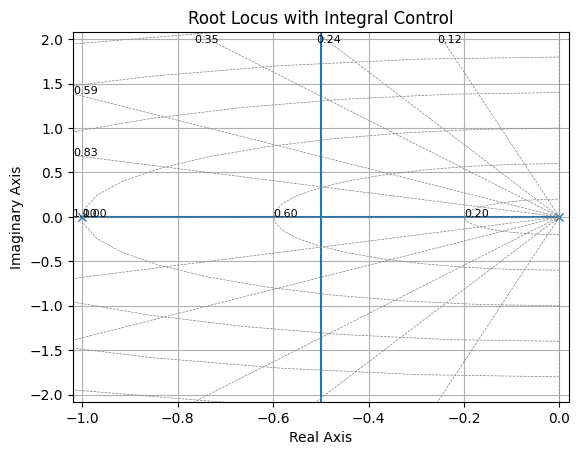

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from control import tf, root_locus

# System parameters
tau_p = 1  # For example, let's take tau_p as 1

# Define the characteristic equation of the system with integral control
# The characteristic equation is tau_p * s^2 + s + K = 0

# For the root locus, we consider the open-loop transfer function G(s)H(s)
# G(s)H(s) = K / (tau_p * s^2 + s)
# This is equivalent to a system with a numerator [K] and a denominator [tau_p, 1, 0]

numerator = [1]  # Coefficient for K
denominator = [tau_p, 1, 0]  # Coefficients of s^2, s, and constant term for the denominator

# Create the transfer function for the system
system = tf(numerator, denominator)

# Plot the root locus
fig, ax = plt.subplots()
root_locus_data = root_locus(system, Plot=True, ax=ax)

# Add labels and title for clarity
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
plt.title('Root Locus with Integral Control')
plt.grid(True)

plt.show()


### Influenza dei Poli sulla risposta del sistema

- **Poli:** Nella teoria del controllo, i poli di un sistema sono le radici della sua equazione caratteristica. Sono cruciali nel determinare il comportamento del sistema nel tempo, in particolare la sua stabilità e la risposta transitoria.
- **Rappresentazione del piano complesso:** i poli sono rappresentati nel piano complesso, dove l'asse orizzontale è l'asse reale e l'asse verticale è l'asse immaginario (asse jω).

- **Posizione dei poli:** La posizione dei poli nel piano complesso influisce in modo significativo sul modo in cui il sistema risponde agli input.
- **Prossimità dell'asse reale:** i poli più vicini all'asse jω (asse immaginario) hanno una parte reale più piccola. Questa piccola parte reale implica un tasso di decadimento più lento della risposta transitoria del sistema.
- **Poli dominanti:** i poli più vicini all'asse jω vengono spesso definiti "poli dominanti" perché hanno un effetto più pronunciato sul comportamento transitorio del sistema. Il loro tasso di decadimento più lento fa sì che determinino la risposta complessiva del sistema, soprattutto nella fase transitoria.


#### Considerazioni sul design
- Con riferimento al luogo delle radici sopra, il polo dominante non può essere spostato ulteriormente a sinistra, limitando quindi la risposta dinamica che possiamo ottenere.
- Quando si progettano sistemi di controllo, gli ingegneri spesso mirano a posizionare i poli dominanti in modo da raggiungere l'equilibrio desiderato tra risposta rapida e stabilità. I poli troppo vicini all’asse jω possono comportare tempi di risposta lenti, mentre i poli troppo lontani nel semipiano sinistro possono far sì che il sistema risponda troppo rapidamente, portando potenzialmente a superamento e instabilità.
- **Risposta transitoria vs. allo stato stazionario:** i poli dominanti influenzano principalmente la risposta transitoria del sistema. Una volta che gli effetti transitori sono decaduti, il comportamento in stato stazionario è determinato da altri fattori, come il guadagno in stato stazionario del sistema e il tipo di controller utilizzato (ad esempio proporzionale, integrale, derivativo).

In questo caso i poli non si spostano verso destra (diventano instabili). Tuttavia, se una delle costanti di tempo dei nostri componenti inizia ad avere un effetto che potrebbe facilmente portare il sistema all'instabilità (il sistema diventa almeno del terzo ordine e potrebbe avere poli che vanno verso RHP per K elevato).

## Introduzione al controllo dei derivati


Consideriamo ora il seguente errore:


<table>
<tr>
    <img src="../pics/15_Introduction_to_Control_Systems_temperature_control_8_Derivative.png" alt="15_Introduction_to_Control_Systems_temperature_control_8_Derivative" style="width:750px;"/>
</tr></table>


Ai tempi $ t_1 $ e $ t_2 $, un controller proporzionale mostrerebbe azioni di controllo identiche poiché l'entità dell'errore è la stessa in entrambi i casi. Tuttavia, gli scenari con $ t_1 $ e $ t_2 $ sono nettamente diversi: con $ t_1 $ l'errore è in aumento, mentre con $ t_2 $ l'errore ha una tendenza decrescente.

Intuitivamente, preferiremmo azioni di controllo diversificate in queste situazioni. Nello specifico, a $ t_1 $, potrebbe essere auspicabile un'azione di controllo più aggressiva per evitare che l'errore si aggravi. Considerando il tasso di variazione dell'errore, o la sua pendenza, possiamo distinguere tra questi scenari. Questa pendenza informa efficacemente il controllore sui potenziali errori futuri, consentendo una risposta più predittiva e adattiva.

Questo è ciò che fa un controllo derivativo: introduce un segnale che non è solo proporzionale all'entità dell'errore (controllo proporzionale), ma sulla derivata di quel segnale.

### Concetto di controllo derivato

#### Natura predittiva del controllo derivato

- **Previsione tramite derivata:** Il controllo derivativo predice gli errori futuri (attraverso la pendenza del segnale di errore) e regola di conseguenza l'azione di controllo, _fornendo maggiore smorzamento durante i transitori_.

**Equazione:**

$$ U(s) = K_c (1 + T_D s) E(s) $$

- **Efficacia:** il controllo derivato è efficace durante i periodi transitori ma non ha alcun impatto sull'errore stazionario.
  - Se l'errore stazionario diventa costante, ovvero quando si raggiunge lo stato stazionario, la derivata è zero e l'effetto del controllo derivativo è zero (vedere il grafico dell'errore sopra).
  - A regime il controllo derivato perde il suo ruolo e solo il controllo proporzionale ed integrale può supportarlo.

## Implementazione del controllo derivato nei sistemi di controllo

Spostiamo ora la nostra attenzione sugli aspetti pratici dell'implementazione del controllo derivato nei sistemi di controllo. Discuteremo le sfide e le alternative nell'impiego del controllo derivato, in particolare nel contesto di un sistema di controllo della posizione.

Abbiamo la seguente azione di controllo:

$$ U(s) = K_c (1 + T_D s) E(s) $$


### Problema di amplificazione del rumore

- **Derivato del rumore ad alta frequenza:** Il controllo derivato può amplificare i segnali di rumore ad alta frequenza, disturbando potenzialmente le prestazioni del sistema.


- **Scenario di esempio:** Considera un segnale di rumore $0,01 \sin(10^3 t)$. L'ampiezza di questo segnale è molto piccola ed è ad alta frequenza. Nel controllo proporzionale, molto probabilmente non abbiamo bisogno di considerarlo esplicitamente perché il sistema stesso è un filtro passa basso.

Nel controllo derivativo, la derivata di questo segnale è $10^3 \cdot 0.01 \cos(10^3 t) = 10 \cos(10^3 t) $, che amplifica significativamente il rumore.

_L'azione derivativa $ T_D s $ applicata a un segnale di rumore può portare a un segnale di grande ampiezza che può oscurare l'effettivo segnale di errore._

Per questo motivo il controllo derivato sopra descritto è solo teorico e mai attuato nella pratica. Si applica sempre un filtro passa basso adatto per l'implementazione (lo vedremo più avanti).

Per lo scopo di questo notebook si presuppone che il rumore ad alta frequenza non sia parte del problema o che sia stato opportunamente filtrato.

### Alternative al controllo derivato standard

Vediamo quali alternative possiamo avere utilizzando un sistema di controllo della posizione. Per questo rivisiteremo il Position Control System che abbiamo analizzato in un precedente quaderno e riportato di seguito.

Tieni presente che abbiamo apportato alcune semplificazioni:
- L'impianto è solo inerziale.
- Si trascura l'induttanza.

<table>
<tr>
    <img src="../pics/15_Introduction_to_Control_Systems_position_control.png" alt="15_Introduction_to_Control_Systems_position_control" style="width:750px;"/>
</tr></table>

Da ciò possiamo calcolare l'equazione (notare che il segno della coppia di disturbo $T_W$ non è importante):

$$
\Big[ \Big(K_p\theta_r - K_p\theta\Big) K_c \Big(1+T_Ds\Big)\frac{K_T}{R_f} + T_W \big] \frac{1}{Js^s} = \theta
$$

che può essere scritto come:

$$
Js^s\theta + K_pK_C\frac{K_T}{R_f}\Big(1+T_Ds\Big)\theta = K_pK_C\frac{K_T}{R_f}\Big(1+T_Ds\Big)\theta_r + T_W
$$

possiamo porre: $K = K_pK_C\frac{K_T}{R_f}$ e otteniamo:

  
$$
\Big(Js^2 + K T_D s + K\Big)\theta(s) = K(1+T_Ds)\theta_r + T_W
$$
  
e finalmente possiamo scrivere la **Funzione di trasferimento:**
  
$$
\frac{\theta(s)}{\theta_r(s)} = \frac{K (1 + T_D s)}{Js^2 + K T_D s + K}
$$


E i "parametri di personalità" dei sistemi sono:

$$
\omega_n = \sqrt{\frac{K}{J}}
$$

$$
2\zeta\omega_n = \frac{KT_D}{J} \rightarrow \zeta=\frac{T_D}{2}\sqrt{\frac{K}{J}}
$$

L'effetto del controllo derivativo sul transitorio è visibile attraverso $\zeta$. È possibile aumentare lo smorzamento aumentando $T_D$.

#### Commenti aggiuntivi:

Se osserviamo la funzione di trasferimento notiamo:
- Il denominatore è un sistema del secondo ordine
- Il numeratore ha uno zero

Quando viene introdotto un cambio di passo nel segnale di comando ($\theta_r$), come $\theta_r = \frac{1}{s}$ nel dominio di Laplace, e questo segnale interagisce con un elemento di controllo derivato caratterizzato da $T_Ds $, provoca la generazione di un impulso, o picco. Questo fenomeno si verifica perché differenziando una funzione a gradino, che rimane sostanzialmente costante dopo il cambiamento iniziale, produce un impulso:

$$
T_Ds \cdot \frac{1}{s} \rightarrow T_D \cdot \delta(t)
$$

Ciò implica che in risposta a un cambiamento di gradino, un controller derivato produce un output iniziale eccezionalmente elevato, comunemente indicato come picco. Questo comportamento può essere interpretato come uno sforzo immediato del sistema di controllo per contrastare un cambiamento improvviso e significativo nell'errore.

Tuttavia, un tale picco nell'output del controller non è sempre auspicabile. Sebbene rappresenti una risposta immediata al cambiamento dell'errore, può essere paragonato all'introduzione di un disturbo nel sistema per poi correggerlo successivamente. Ciò potrebbe potenzialmente portare a problemi quali instabilità del sistema o eccessivo superamento, soprattutto nei sistemi sensibili ai rapidi cambiamenti.

Per affrontare questo problema, i sistemi di controllo sono spesso dotati di meccanismi di filtraggio aggiuntivi. In alternativa, viene impiegato un approccio modificato al controllo derivato, che non reagisce così intensamente alle componenti ad alta frequenza del segnale di errore. Queste strategie di progettazione aiutano a rendere più fluida la risposta del controller, prevenendo picchi improvvisi e garantendo un comportamento del sistema più stabile.

<table>
<tr>
    <img src="../pics/15_Introduction_to_Control_Systems_position_control_1.png" alt="15_Introduction_to_Control_Systems_position_control_1" style="width:750px;"/>
</tr></table>

E la presenza della Dinamo Tachimetrica equivale a:

<table>
<tr>
    <img src="../pics/15_Introduction_to_Control_Systems_position_control_2.png" alt="15_Introduction_to_Control_Systems_position_control_2" style="width:750px;"/>
</tr></table>

Invece di calcolare la derivata del segnale di uscita, è possibile utilizzare una dinamo tachimetrica per generare un segnale di feedback proporzionale alla velocità di variazione dell'uscita.

Questo metodo aggira le sfide tipicamente incontrate quando si differenzia il comando di input, in particolare i problemi di amplificazione del rumore e la creazione di picchi quando si verificano cambiamenti improvvisi nel segnale di comando.

Nell'effettiva implementazione di questo sistema non viene effettuata alcuna operazione derivativa. Sebbene il modello includa un termine derivato ($sK_t$), nella pratica questa differenziazione non avviene.

È importante notare, tuttavia, che questo approccio non è universalmente applicabile. Ad esempio, nei sistemi di controllo della temperatura, non esiste un segnale intrinseco all'interno del sistema che rappresenti direttamente la derivata della variabile controllata.

Nel controllo del movimento ciò è possibile, nel controllo del processo generalmente non è possibile. In questo caso aggiungiamo filtri adeguati per evitare picchi.

Invece di calcolare direttamente la derivata del segnale di uscita, è possibile utilizzare una dinamo tachimetrica per produrre un segnale di feedback correlato alla velocità di variazione dell'uscita. Questa strategia affronta in modo efficace i problemi tipici associati alla differenziazione diretta del comando di input. Queste problematiche includono l'amplificazione del rumore e la generazione di picchi, soprattutto quando il segnale di comando subisce brusche variazioni.

Nelle implementazioni pratiche di tale sistema, non viene eseguito un calcolo della derivata effettiva. Il modello del sistema potrebbe includere un termine derivato rappresentato come $ sK_t $, ma in realtà questo processo di differenziazione non viene eseguito. La dinamo tachimetrica fornisce intrinsecamente un segnale che riflette la derivata, aggirando così la necessità di una differenziazione esplicita.

Tuttavia, è fondamentale riconoscere che questo metodo non è universalmente applicabile a tutti i tipi di sistemi di controllo. Ad esempio, nei sistemi di controllo della temperatura, in genere non è presente un segnale immediatamente disponibile che rappresenti intrinsecamente la derivata della temperatura. Tali sistemi non hanno un equivalente della dinamo tachimetrica utilizzata nei sistemi di controllo del movimento, dove il feedback derivato è naturalmente integrato.

In contesti come il controllo di processo, dove non è possibile ottenere direttamente un segnale derivato, è necessario impiegare strategie alternative. Questi spesso comportano l'aggiunta di filtri adeguati al sistema di controllo. Questi filtri sono progettati per mitigare o eliminare gli effetti indesiderati, come i picchi, che possono verificarsi quando si utilizza il controllo derivato. Questo approccio garantisce prestazioni del sistema più fluide e riduce il rischio di instabilità o di risposta eccessiva ai disturbi ad alta frequenza.